<center>
<img src="https://habrastorage.org/web/677/8e1/337/6778e1337c3d4b159d7e99df94227cb2.jpg"/>

# Отчёт по проекту "Прогнозирование оттока клиентов"
<center>

## Содержание
- Введение: цели и задачи проекта
- Методика измерения качества и критерий успеха
- Техническое описание решения
- Оценка модели
- Итоги

## Введение
Выстраивание взаимоотношений с клиентами или customer relationship managmenet (CRM) является важным звеном в функционировании любого бизнеса. От того, насколько хорошо простроена работа с аудиторией зачастую зависит успех всей компании. Одна из наиболее актуальных задач из области CRM: прогнозирование оттока пользователей или churn prediction. Суть задачи заключается в заблаговременном нахождении сегмента пользователей, склонных через некоторый промежуток времени отказаться от использования некоторого продукта или услуги. Точное и своевременное нахождение таких пользователей позволяет эффективно бороться с их оттоком, например, выявлять причины оттока и принимать меры по удержанию клиентов. Эта задача  особенно актуальна для отраслей, где распространение услуги близко к отметке 100%. 

**Цель проекта:** по признаковому описанию найти пользователей, склонных к оттоку.

В рамках данной цели были поставлены следующие **задачи:**
-  провести анализ и визуализацию данных, предоставленных без описания, и подготовить данные для построения модели
-  построить вероятностную модель бинарной классификации, где целевой класс представляют собой пользователи, покидающие сервис
-  оценить качество модели и экономический эффект от её внедрения

## Методика измерения качества и критерий успеха
Ключевой метрикой выберем ROC-AUC, так как она неплохо подходит для несбалансированных классов, к тому же эта метрика зависит от предсказанных вероятностей классов, а не от более "жесткой" классификации отток - не отток. В качестве дополнительных метрик будут использованы точность и полнота модели по классу 'отток'. Модель будет протестирована с помощью кросс-валидации, на отложенной выборке и на выборке с сайта Kaggle.
Критерием успеха будем считать ROC_AUC > 0.7, что является достаточно хорошей величиной с точки зрения бизнеса.


## Техническое описание решения

Данные были предоставлены французской телекоммуникационной компанией Orange. В задаче речь идет о клиентских данных, поэтому данные были предварительно обфусцированы и анонимизированны: из датасета убрана любая персональная информация, позволяющая идентифицировать пользователей, а также не представлены названия и описания переменных, предназначенных для построения прогнозов. В проекте нам пришлось работать с двумя схожими наборами данных:  основным - 18.3 тыс. объектов и дополнительным - 40 тыс объектов, данные наборы включают 230 переменных, из которых первые 190 переменных - числовые, и оставшиеся 40 переменные - категориальные.

### Первичный анализ данных
Полученные данные анонимны, наблюдается сильный дисбаланс классов, в данных много пропусков и выбросов, поэтому задача интересна в плане работы с признаками. 

**Вещественные признаки:** Распределения top-30 признаков, наиболее коррелирующих с целевой переменной,для разных классов отличаются (и они редко где похожи на нормальное) , но полезных данных мало - много пропусков. Предположительно, наиболее полезными окажутся признаки, наиболее коррелирующие  с целевой переменной, которые имеют и наибольшую корреляцию, и мало пропущенных значений: 189, 73, 7, 126. На рисунке 1 приведены распределения в разрезе классов трех числовых признаков, в итоге оказавшихся наиболее полезными.
Значения 10 наименее коррелирующих с целевой переменной признаков имеют далеко лежащие выбросы - при рассмотрении распределений не помогает даже логарифмирование. Почти у всех этих признаков наблюдается линейный тренд в графиках попарных зависимостей.

**Категориальные признаки**: Большинстве признаков имеет много категорий, поэтому нам потребуются способы кодирования, способные адекватно их обработать. Также упомянем, что раз в наиболее коррелирующих с целевой переменной признаках очень много категорий, то возникает вопрос насколько такие признаки буудут полезны при построении модели.


Рис. 1. Распределения в разрезе классов 'отток' (красный цвет) и 'не-отток' (синий цвет) для наиболее полезных числовых признаков: Var126, Var73 и Var189. Значения признаков нормированы на отрезок [0,1] и логарифмированы для наглядности.

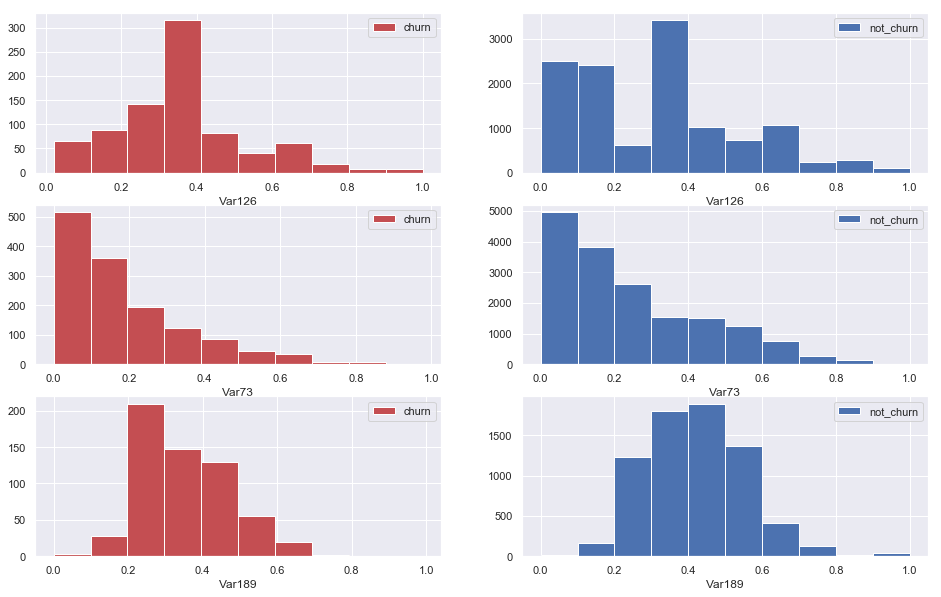

In [4]:
from IPython.display import Image
Image(filename = 'dist.png')

Далее переходим к схематичному описанию. Выбранный вариант отмечен ярко-голубым; вариант, дающий качество на кросс-валидации чуть похуже, - светло-голубым.

### Подготовка к построению модели

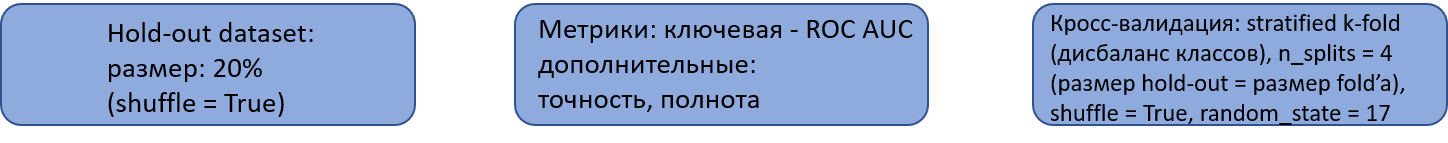

In [17]:
Image(filename = 'Prepare_to_model.png')

### Baseline-модели: отбор

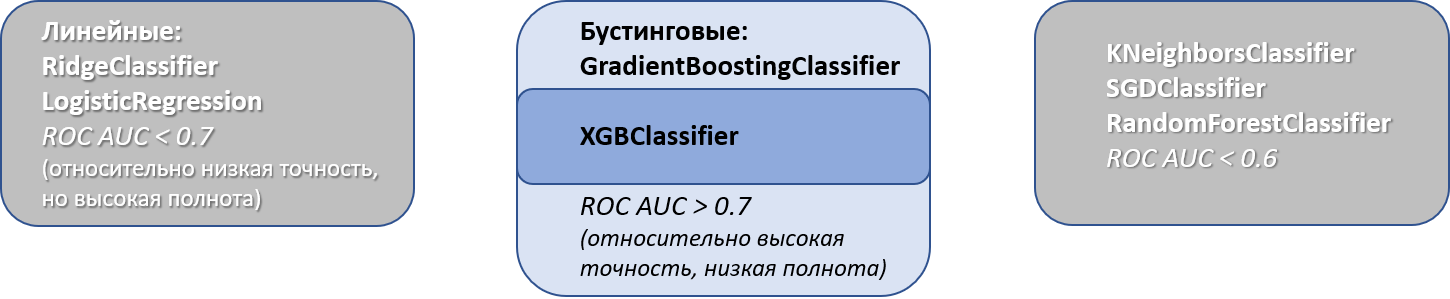

In [23]:
Image(filename = 'baseline_choice.png')

### Выбор способа обработки данных

Здесь и далее сравнение было проведено на кросс-валидации:

In [ ]:
skf = StratifiedKFold(n_splits=4, random_state=17, shuffle = True)
cross_val_score(XGBClassifier(n_jobs = -1), data, target, cv = skf, scoring = 'roc_auc').mean()

##### Фильтрация признаков по количеству пропусков и обработка выбросов

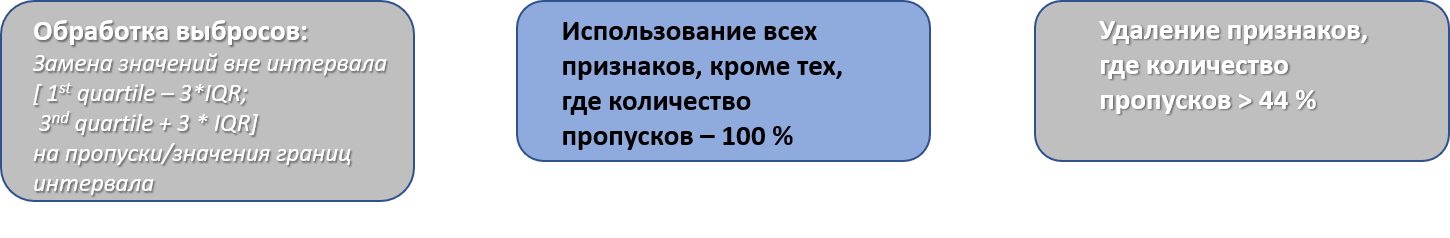

In [25]:
Image(filename = 'nan_outliers.png')

##### Числовые данные: обработка пропусков

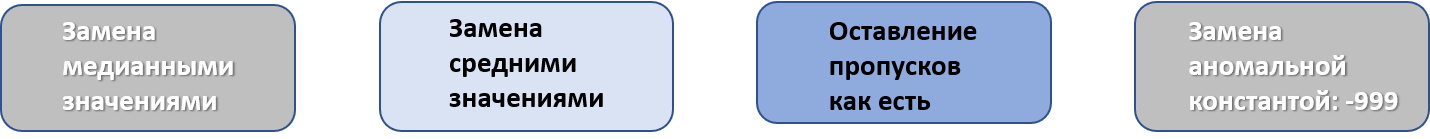

In [26]:
Image(filename = 'num_nan.png')

##### Категориальные данные: обработка пропусков и кодирование

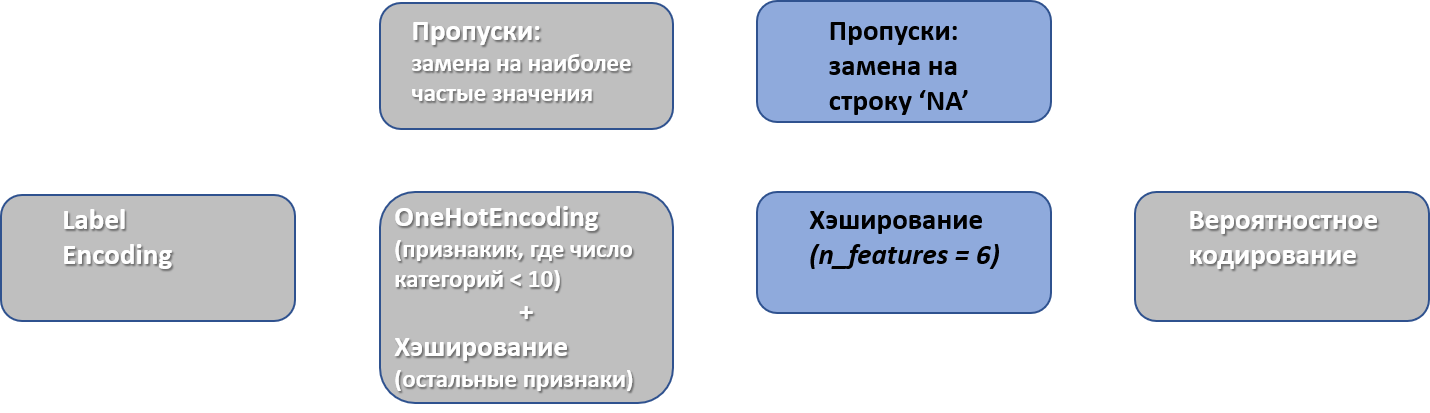

In [27]:
Image(filename = 'cat_nan.png')

### Кривые обучения и валидации

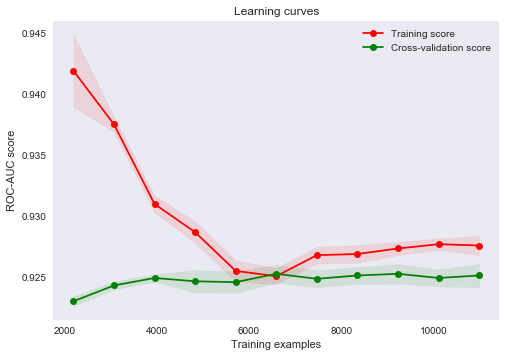

In [28]:
Image(filename = 'learning_curves.png')

Действительно, тестовая кривая примерно на 6700 тренировчных образцов сходится с тренировочной, а дальше - качество на тесте не растет. Так что, судя по графику, дальнейшее увеличение размера обучающей выборки перестает влиять на качество модели на тесте. Но...

### Балансирование выборки

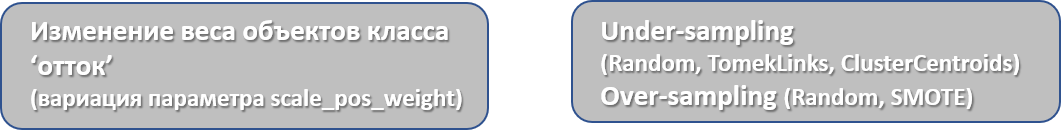

In [29]:
Image(filename = 'balance.png')

Балансирование выборки не улучшает качество классификации на отложенной выборке, поэтому продолжаем использовать всю выборку 'как есть'.

### Отбор признаков (количество исходных признаков - 418)

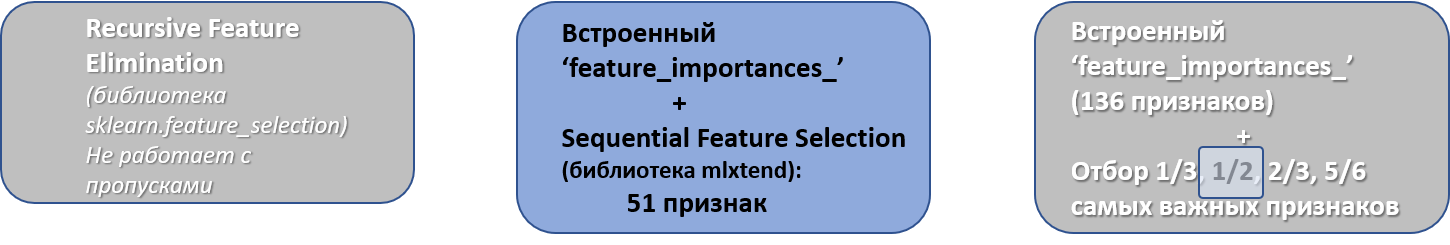

In [31]:
Image(filename = 'feature_selection.png')

### Подбор параметров модели

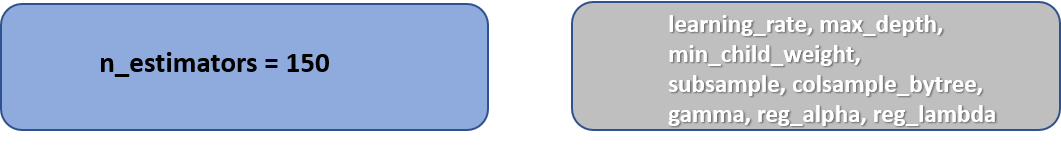

In [33]:
Image(filename = 'parameters.png')

##### Финальная модель: XGBClassifier( n_estimators=150, n_jobs=-1)

## Оценка качества модели

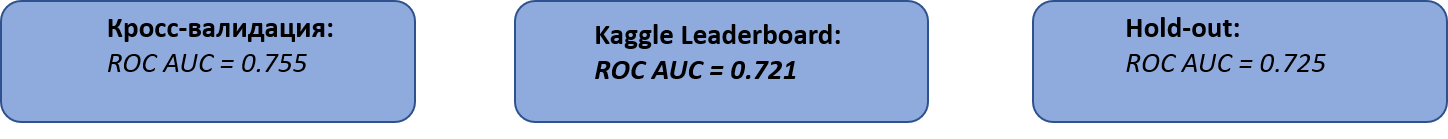

In [34]:
Image(filename = 'roc_aucs.png')

Да, мы достигли поставленной цели - получили модель с качеством, достаточно хорошим для бизнес-решений.

На каких объектах модель склонна ошибаться? Например, на объектах, которые имеют значения важного признака, характерные для другого класса, если другие важные признаки имеют значения, характерные и для класса 'отток', и для класса 'не-отток'.
Я думаю, опытный data scientist сможет профессионально скорректировать модель и улучшить её качество.

Другой способ повысить качество модели - блендинг/стекинг бустинговых и линейных моделей.

И, наконец, самый очевидный способ улучшить модель - использовать больше данных для обучения! Мы обучили модель на выборке с первых недель курса (40000 объектов, использовать тот же набор признаков и те же параметры модели оказалось наилучшим) и повысили качество в соревновании Kaggle  с 0.721 до 0.723 (top 9%). 
Это не читерство, это "инициатива" (с) команда курса.

И, наконец, перечислим признаки, оказавшиеся наиболее важными: Var226, Var218, Var126, Var205, Var212, Var73, Var189, Var74.


##### Экономический эффект от внедрения

Также был оценен экономический эффект внедрения модели.
Для параметров:
- размер абонентской базы - 10 миллионов человек (N)
- средний чек  - 400 рублей (ARPU)
- стоимость удержания - 10 % от среднего чека (retention_cost_coef).
- вероятность удержания (человек принял бонус и не ушел) - 50 % (retention_proba).
- размер оптимального топа - 2.9 % (churn_top)
- точность прогноза по классу 'отток' - 34.6 % (precision_churn)

мы оценили прибыль по прошествии месяца в миллионах рублей по формуле:

PROFIT = "доход" - "расходы" = N * top * ARPU * (precision_churn * retention_proba - retention_cost_coef)

Полученная прибыль составила 8.52 миллиона рублей.


Конечно, наша модель много чего не учитывает, и вообще обучена на французских данных, но мы можем предполагать, что эффект от внедрения модели будет положительным.
Поэтому, я считаю, стоит провести А/А (1 месяц), а затем А/В тестирование (ещё 1 месяц) в месяцы, свободные от праздников и массовых отпусков. На мой взгляд, здесь также важно провести сегментацию пользователей, например, по размеру среднего чека (и взять для теста по сто тысяч людей в каждой группе). Может оказаться, что эффект от удержания абонентов, мало пользующихся услугами телекома, будет незначимым или вовсе отрицательным. Можно ещё провести сегментацию абонетов по предпочтительному способу использования телеком-услуг (звонки, интернет, соцсети), чтобы персонифицировать бонус-предложение.

## Итоги

В работе были обработаны "закрытые" данные и построена вероятностная модель бинарной классификации с достаточно хорошим для бизнес-решений качеством.

Оценка экономического эфеекта внедрения модели подтвердила его положительное значение.